In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [4]:
from datasist.structdata import detect_outliers
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , RobustScaler
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
import joblib

In [5]:
warnings.filterwarnings('ignore')

In [6]:
sns.set_theme(context = 'notebook' , style = 'darkgrid' , palette = 'mako' 
              , font_scale = 1.1 , rc = {'figure.figsize' : (8 , 4)})

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv('dataset.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [9]:
col = ['Posted_By', 'Under_Construction', 'approved', 'Number_of_Rooms', 'Property_type',
       'House_areaSQF', 'Ready_to_move', 'Resale', 'Address', 'Longitude',
       'Latitude', 'Price']

In [10]:
df.columns = col

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Posted_By           29451 non-null  object 
 1   Under_Construction  29451 non-null  int64  
 2   approved            29451 non-null  int64  
 3   Number_of_Rooms     29451 non-null  int64  
 4   Property_type       29451 non-null  object 
 5   House_areaSQF       29451 non-null  float64
 6   Ready_to_move       29451 non-null  int64  
 7   Resale              29451 non-null  int64  
 8   Address             29451 non-null  object 
 9   Longitude           29451 non-null  float64
 10  Latitude            29451 non-null  float64
 11  Price               29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [12]:
df.duplicated().sum()

401

In [13]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [14]:
df.index

RangeIndex(start=0, stop=29050, step=1)

In [15]:
df.isnull().mean()*100

Posted_By             0.0
Under_Construction    0.0
approved              0.0
Number_of_Rooms       0.0
Property_type         0.0
House_areaSQF         0.0
Ready_to_move         0.0
Resale                0.0
Address               0.0
Longitude             0.0
Latitude              0.0
Price                 0.0
dtype: float64

In [16]:
df['Posted_By'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

<AxesSubplot:xlabel='Posted_By', ylabel='count'>

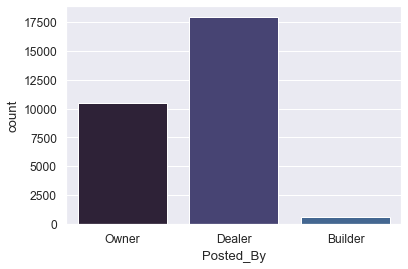

In [17]:
sns.countplot(df['Posted_By'])

In [18]:
posted_by_encoder = BinaryEncoder()

In [19]:
df = pd.concat([df , posted_by_encoder.fit_transform(df[['Posted_By']])] , axis = 1)
df.drop(['Posted_By'] , axis = 1 , inplace = True)

In [20]:
joblib.dump(posted_by_encoder , 'posted_by_encoder.pkl')

['posted_by_encoder.pkl']

In [21]:
df['Under_Construction'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Under_Construction', ylabel='count'>

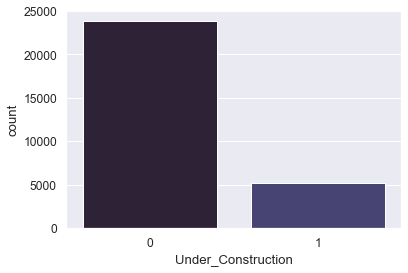

In [22]:
sns.countplot(df['Under_Construction'])

In [23]:
df['approved'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='approved', ylabel='count'>

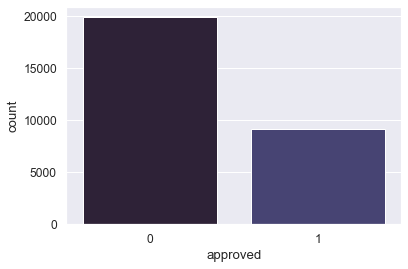

In [24]:
sns.countplot(df['approved'])

In [25]:
df.columns

Index(['Under_Construction', 'approved', 'Number_of_Rooms', 'Property_type',
       'House_areaSQF', 'Ready_to_move', 'Resale', 'Address', 'Longitude',
       'Latitude', 'Price', 'Posted_By_0', 'Posted_By_1'],
      dtype='object')

In [26]:
df['Number_of_Rooms'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

<AxesSubplot:xlabel='Number_of_Rooms'>

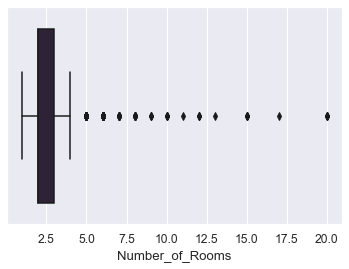

In [27]:
sns.boxplot(df['Number_of_Rooms'])

In [28]:
df.drop(df[df['Number_of_Rooms'] == 20].index , inplace = True , axis = 0)

In [29]:
df['Number_of_Rooms'].value_counts().to_frame().T

,2,3,1,4,5,6,7,8,10,15,12,9,13,17,11
Number_of_Rooms,13164,10365,3540,1698,189,52,11,10,4,4,3,3,1,1,1


<AxesSubplot:xlabel='count', ylabel='Number_of_Rooms'>

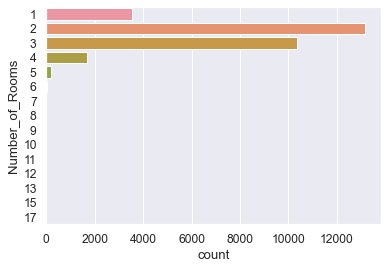

In [30]:
sns.countplot(data = df , y = 'Number_of_Rooms')

In [31]:
df.reset_index(inplace = True , drop = True)

In [32]:
df['Property_type'].unique()

array(['BHK', 'RK'], dtype=object)

In [33]:
df['Property_type'].value_counts()

BHK    29022
RK        24
Name: Property_type, dtype: int64

<AxesSubplot:xlabel='Property_type', ylabel='count'>

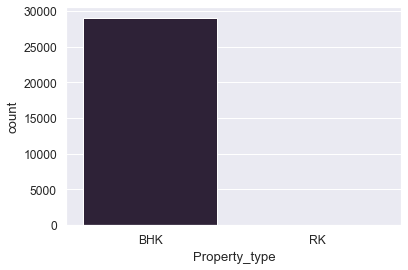

In [34]:
sns.countplot(df['Property_type'])

In [35]:
property_type_encoder = OneHotEncoder(sparse = False , drop = 'first')

In [36]:
df = pd.concat([df , pd.DataFrame(property_type_encoder.fit_transform(df[['Property_type']]) ,
             columns = property_type_encoder.get_feature_names_out())] , axis = 1)
df.drop(['Property_type'] , axis = 1 , inplace = True)

In [37]:
joblib.dump(property_type_encoder , 'property_type_encoder.plk')

['property_type_encoder.plk']

###### Convert house area to m2

In [38]:
df['House_areaSQF'] = df['House_areaSQF'].apply(lambda x : x / 10.764)

In [39]:
df['House_areaSQF'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
House_areaSQF,29046.0,1861.132165,177865.408138,0.278707,83.61204,108.937799,144.014224,2.364785e+07


<AxesSubplot:xlabel='House_areaSQF'>

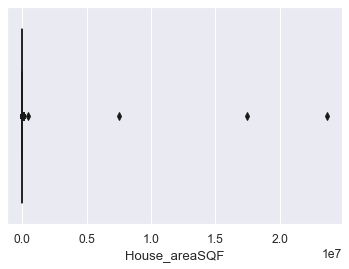

In [40]:
sns.boxplot(df['House_areaSQF'])

<AxesSubplot:xlabel='House_areaSQF', ylabel='Density'>

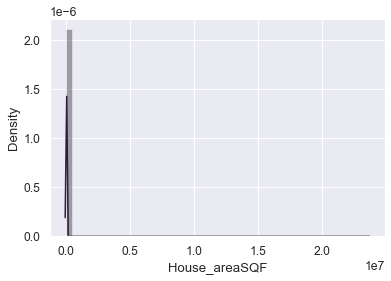

In [41]:
sns.distplot(df['House_areaSQF'])

In [42]:
def Detect_Outliers(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    maxw , minw = des['75%'] + (1.5 * IQR) , des['25%'] - (1.5 * IQR)
    otlie = data[(data[col] > maxw) | (data[col] < minw)].index
    return otlie
Detect_Outliers(df , 'House_areaSQF')

Int64Index([   40,    57,    68,    92,   117,   120,   130,   135,   139,
              160,
            ...
            28895, 28896, 28900, 28912, 28969, 28992, 29005, 29006, 29010,
            29020],
           dtype='int64', length=1609)

In [43]:
df.drop(Detect_Outliers(df , 'House_areaSQF') , axis = 0 , inplace = True)

<AxesSubplot:xlabel='House_areaSQF'>

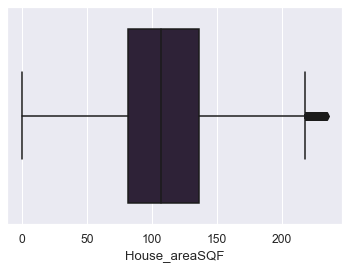

In [44]:
sns.boxplot(data = df , x = 'House_areaSQF')

<AxesSubplot:xlabel='House_areaSQF', ylabel='Density'>

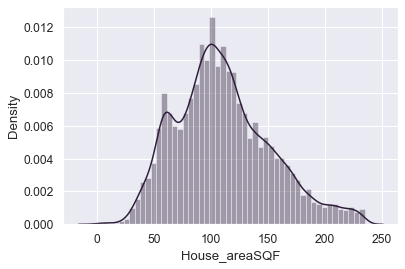

In [45]:
sns.distplot(df['House_areaSQF'])

In [46]:
df.reset_index(inplace = True , drop = True)

In [47]:
df.columns

Index(['Under_Construction', 'approved', 'Number_of_Rooms', 'House_areaSQF',
       'Ready_to_move', 'Resale', 'Address', 'Longitude', 'Latitude', 'Price',
       'Posted_By_0', 'Posted_By_1', 'Property_type_RK'],
      dtype='object')

In [48]:
df['Ready_to_move'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Ready_to_move', ylabel='count'>

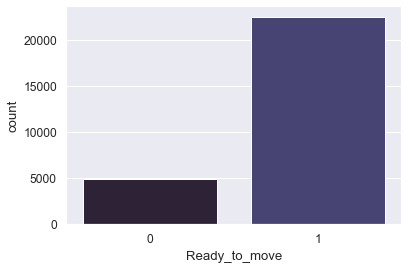

In [49]:
sns.countplot(df['Ready_to_move'])

In [50]:
df['Resale'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Resale', ylabel='count'>

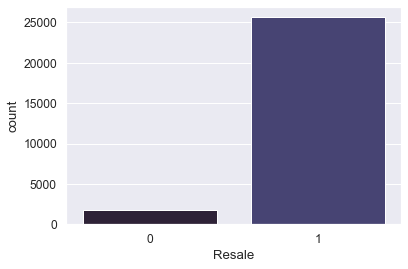

In [51]:
sns.countplot(df['Resale'])

In [52]:
df.columns

Index(['Under_Construction', 'approved', 'Number_of_Rooms', 'House_areaSQF',
       'Ready_to_move', 'Resale', 'Address', 'Longitude', 'Latitude', 'Price',
       'Posted_By_0', 'Posted_By_1', 'Property_type_RK'],
      dtype='object')

In [53]:
df['Road'] = df['Address'].apply(lambda x : x.split(',')[0].strip().lower())
df['City'] = df['Address'].apply(lambda x : x.split(',')[1].strip().lower())

In [54]:
cty_freq = df['City'].value_counts()
cty_lst = [i for i,j in zip(cty_freq.index , cty_freq.values) if j < 80]
df['City'] = df['City'].apply(lambda x : 'Other' if x in cty_lst else x)

<AxesSubplot:xlabel='count', ylabel='City'>

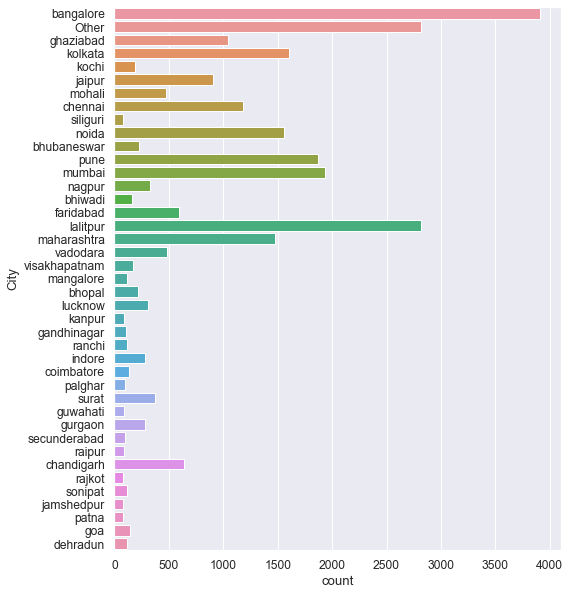

In [55]:
plt.figure(figsize = (8 , 10))
sns.countplot(data = df , y = 'City')

In [56]:
rod_freq = df['Road'].value_counts()
rod_lst = [i for i,j in zip(rod_freq.index , rod_freq.values) if j < 70]
df['Road'] = df['Road'].apply(lambda x : 'Other' if x in rod_lst else x)

In [57]:
len(df['Road'].value_counts())

47

In [58]:
df.drop(['Address','Longitude','Latitude'] , axis = 1 , inplace = True)

In [59]:
city_encoder = BinaryEncoder()

In [60]:
df = pd.concat([df , city_encoder.fit_transform(df[['City']])] , axis = 1)

In [61]:
df.drop(['City'] , axis = 1 , inplace = True)

In [62]:
joblib.dump(city_encoder , 'city_encoder.plk')

['city_encoder.plk']

In [63]:
rod_encoder = BinaryEncoder()

In [64]:
df = pd.concat([df , city_encoder.fit_transform(df[['Road']])] , axis = 1)

In [65]:
df.drop(['Road'] , axis = 1 ,inplace = True)

In [66]:
joblib.dump(rod_encoder , 'road_encoder.plk')

['road_encoder.plk']

In [67]:
df.columns

Index(['Under_Construction', 'approved', 'Number_of_Rooms', 'House_areaSQF',
       'Ready_to_move', 'Resale', 'Price', 'Posted_By_0', 'Posted_By_1',
       'Property_type_RK', 'City_0', 'City_1', 'City_2', 'City_3', 'City_4',
       'City_5', 'Road_0', 'Road_1', 'Road_2', 'Road_3', 'Road_4', 'Road_5'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27437 entries, 0 to 27436
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Under_Construction  27437 non-null  int64  
 1   approved            27437 non-null  int64  
 2   Number_of_Rooms     27437 non-null  int64  
 3   House_areaSQF       27437 non-null  float64
 4   Ready_to_move       27437 non-null  int64  
 5   Resale              27437 non-null  int64  
 6   Price               27437 non-null  float64
 7   Posted_By_0         27437 non-null  int64  
 8   Posted_By_1         27437 non-null  int64  
 9   Property_type_RK    27437 non-null  float64
 10  City_0              27437 non-null  int64  
 11  City_1              27437 non-null  int64  
 12  City_2              27437 non-null  int64  
 13  City_3              27437 non-null  int64  
 14  City_4              27437 non-null  int64  
 15  City_5              27437 non-null  int64  
 16  Road

In [69]:
y = np.log(df['Price'])
x = df.drop(['Price'] , axis = 1)

In [70]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 ,
                                                       random_state = 1)

In [71]:
x_train.reset_index(inplace = True , drop = True)
x_test.reset_index(inplace = True , drop = True)
y_train.reset_index(inplace = True , drop = True)
y_test.reset_index(inplace = True , drop = True)

In [72]:
sclr = RobustScaler()

In [77]:
col_to_scale = ['House_areaSQF' , 'Number_of_Rooms']

In [73]:
x_train[col_to_scale] = sclr.fit_transform(x_train[col_to_scale])

In [74]:
x_train['House_areaSQF'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
House_areaSQF,21949.0,0.074348,0.764823,-1.943023,-0.456067,0.0,0.543933,2.347542


<AxesSubplot:xlabel='House_areaSQF', ylabel='Density'>

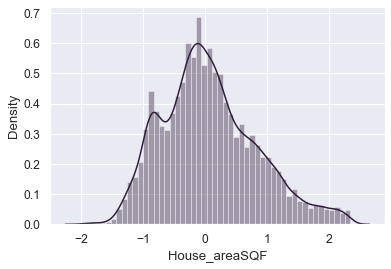

In [75]:
sns.distplot(x_train['House_areaSQF'])

In [76]:
x_test[col_to_scale] = sclr.transform(x_test[['House_areaSQF' , 'Number_of_Rooms']])

ValueError: X has 1 features, but RobustScaler is expecting 2 features as input.

In [ ]:
sns.distplot(x_test['House_areaSQF'])

In [ ]:
joblib.dump(sclr , 'sclr.plk')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train , y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [ ]:
mean_squared_error(y_true = y_test ,y_pred = y_pred , squared = False )

In [ ]:
model.score(x_test , y_test)

In [ ]:
r2_score(y_true = y_test ,y_pred = y_pred)

In [ ]:
sns.boxplot(np.log(df['Price']))

In [ ]:
joblib.dump(model , 'HousePriceRegression.plk')